# Scale factors from DIALS

## Figure 2

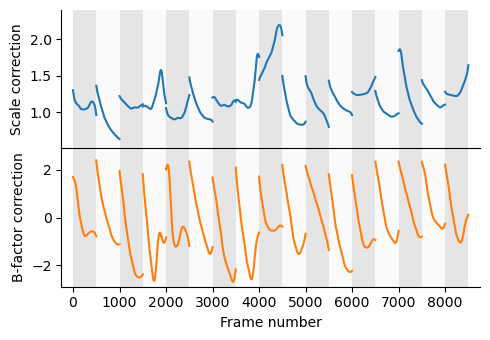

In [1]:
import json
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import gridspec, patches

# load from dials report
with open('dials/report.json', 'r') as f:
    rept = json.load(f)

fig = plt.figure(figsize=(5,3.5))

# set height ratios for subplots
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1]) 

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1], sharex = ax1)

for j in range(0,17):
    d = rept['scaling_model'][f'smooth_scale_model_{j}']['data'][0]
    scale = d['y']
    d = rept['scaling_model'][f'smooth_scale_model_{j}']['data'][2]
    bdecay = d['y']
    batch = np.linspace(j*500,(j+1)*500,len(d['x']))
    
    ax1.plot(batch,scale,'tab:blue')
    ax2.plot(batch,bdecay,'tab:orange')
    
    if j % 2:
        fc = (0,0,0,.02)
    else:
        fc = (0,0,0,.1)
    ax1.add_patch(patches.Rectangle((j*500, 0), 500, 3,facecolor=fc,edgecolor=None))
    ax2.add_patch(patches.Rectangle((j*500, -3), 500, 6,facecolor=fc,edgecolor=None))

plt.setp(ax1.get_xticklabels(), visible=False)

ax1.set_ylim(0.51,2.4)
ax2.set_ylim(-2.9,2.9)

ax1.set_ylabel('Scale correction')
ax2.set_ylabel('B-factor correction')
ax2.set_xlabel('Frame number')

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(True)
ax2.spines['right'].set_visible(False)

ax1.set_xlim(-250,8750)

plt.tight_layout()
plt.subplots_adjust(hspace=0)

#fig.savefig('figures/fig2.pdf',transparent=True)